# animationの表示
 - アニメーションはvscodeのjupyterでは動作せず

In [ ]:
import tkinter as tk
import time
import threading
import math
import itertools
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


alive = False
started = threading.Event()

# When windows is closed.
def _destroy_window():
    global t
    global started
    global alive
    alive = False
    started.set()
    t.join()
    root.quit()
    root.destroy()

def stop():
    global started
    global alive
    alive = False
    print('Threading was stopped ')
    started.clear()

def start():
    global started
    global alive
    alive = True
    print('THreading starts')
    started.set()

# Tkinter Class
root = tk.Tk()
root.withdraw()
root.title('Waveform Animation')
root.protocol('WM_DELETE_WINDOW', _destroy_window)  # When you close the tkinter window.
button_start = tk.Button(text='START', command=start)
button_start.pack()
button_stop = tk.Button(text='STOP', command=stop)
button_stop.pack()
button_close = tk.Button(text='CLOSE', command=quit)
button_close.pack()

def _redraw(_, x, y):
    """グラフを再描画するための関数"""
    # 現在のグラフを消去する
    plt.cla()
    # 折れ線グラフを再描画する
    plt.ylim(-1.2, 1.2)
    plt.plot(x, y)

i = 100

def main():
    # 描画領域
    fig = plt.figure(figsize=(10, 6))
    # 描画するデータ (最初は空)
    x = [j for j in range(100)]
    y = [0.0] * 100

    def _update():
        """データを一定間隔で追加するスレッドの処理"""
        global i
        global started
        global alive
        started.wait()
        iterater_y = 0
        while alive:
#        for frame in itertools.count(0, 0.1):
            x.pop(0)
            x.append(i)
            i += 1
            # x.append(frame)
            y.pop(0)
            y.append(math.sin(iterater_y))
            iterater_y += 0.1
            # データを追加する間隔 (100ms)
            time.sleep(0.2)
            started.wait()

    def _init():
        """データを一定間隔で追加するためのスレッドを起動する"""
        global alive
        global t
        alive = True
        t = threading.Thread(target=_update)
        t.daemon = True
        t.start()

    params = {
        'fig': fig,
        'func': _redraw,  # グラフを更新する関数
        'init_func': _init,  # グラフ初期化用の関数 (今回はデータ更新用スレッドの起動)
        'fargs': (x, y),  # 関数の引数 (フレーム番号を除く)
        'interval': 200,  # グラフを更新する間隔 (ミリ秒)
    }
    anime = animation.FuncAnimation(**params)

# Canvas
    canvas = FigureCanvasTkAgg(fig, master=root)  # Generate canvas instance, Embedding fig in root
    canvas.draw()
    canvas.get_tk_widget().pack()

# root
    root.update()
    root.deiconify()
    root.mainloop()

main()


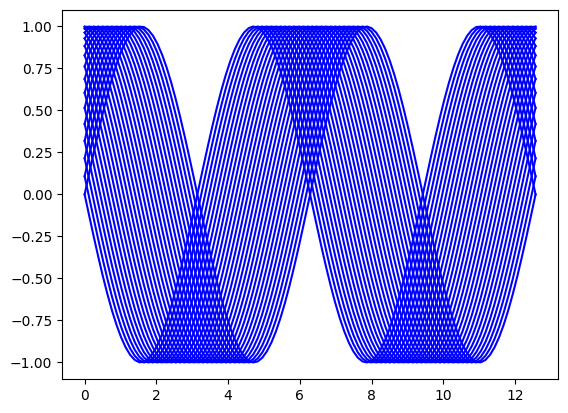

In [6]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation

x = np.linspace(0, np.pi * 4, 100)

fig, ax = plt.subplots()

frames = []  # 各フレームを構成する Artist 一覧

# フレームごとの Artist を作成する。
for delta in np.linspace(0, np.pi, 30):
    y = np.sin(x + delta)

    # 折れ線グラフを作成する。
    artists = ax.plot(x, y, c="b")

    # このフレームの Artist 一覧を追加する。
    frames.append(artists)

# アニメーションを作成する。
anim = ArtistAnimation(fig, frames, interval=1000)

# gif 画像として保存する。

plt.show()


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib.animation import ArtistAnimation

x = np.linspace(0, np.pi * 4, 100)

fig, ax = plt.subplots(facecolor="w")

frames = []  # 各フレームを構成する Artist 一覧

# フレームごとの Artist を作成する。
for delta in np.linspace(0, np.pi, 30):
    y = np.sin(x + delta)

    # 折れ線グラフを作成する。
    artists = ax.plot(x, y, c="b")

    # このフレームの Artist 一覧を追加する。
    frames.append(artists)

# アニメーションを作成する。
anim = ArtistAnimation(fig, frames, interval=200)
HTML(anim.to_jshtml())

In [10]:
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


def _destroyWindow():
    root.quit()
    root.destroy()

root = tk.Tk()
root.withdraw()
root.protocol('WM_DELETE_WINDOW', _destroyWindow)  # When you close the tkinter window.
# グラフとして描画するデータ
x = np.array([1,2,3,4])
y = np.array([2,3,4,5])

# グラフを描画
fig = plt.Figure()
axis = fig.subplots()
axis.plot(x, y)
canvas = FigureCanvasTkAgg(fig, master=root)  # Generate canvas instance, Embedding fig in root
canvas.draw()
canvas.get_tk_widget().pack()
root.update()
root.deiconify()
root.mainloop()

# スレッドでのグラフの更新

In [1]:
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time
import threading

alive = False
started = threading.Event()
thread = None

i = 1
def _destroyWindow():
    global thread
    global started
    global alive
    alive = False
    started.set()
    thread.join()
    root.quit()
    root.destroy()

# グラフを描画
def graph_update():
    global i
    global started
    started.wait()
    while alive:
        x = np.array([j+i for j in range(5)])
        y = np.array([j*i for j in range(5)])
    #x = np.array([j for j in range(5)])
    #y = np.array([j for j in range(5)])

        i += 1
        axis.plot(x, y)
        canvas.draw()
        time.sleep(1)
        started.wait()

def start_thread():
    global alive
    global started
    alive = True
    started.set()

root = tk.Tk()
root.withdraw()
root.protocol('WM_DELETE_WINDOW', _destroyWindow)  # When you close the tkinter window.
button = tk.Button(master=root, text='update', command=start_thread)
button.pack()


fig = plt.Figure()
axis = fig.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)  # Generate canvas instance, Embedding fig in root

canvas.draw()
canvas.get_tk_widget().pack()
thread = threading.Thread(target=graph_update)
thread.daemon = True
thread.start()
root.update()
root.deiconify()
root.mainloop()

In [ ]:
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

i = 1
def _destroyWindow():
    root.quit()
    root.destroy()

# グラフを描画
def graph_update():
    global i

    x = np.array([j+i for j in range(5)])
    y = np.array([j*i for j in range(5)])
    #x = np.array([j for j in range(5)])
    #y = np.array([j for j in range(5)])
    print(y)
    i += 1
    axis.plot(x, y)
    canvas.draw()


root = tk.Tk()
root.withdraw()
root.protocol('WM_DELETE_WINDOW', _destroyWindow)  # When you close the tkinter window.
button = tk.Button(master=root, text='update', command=graph_update)
button.pack()


fig = plt.Figure()
axis = fig.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)  # Generate canvas instance, Embedding fig in root

canvas.draw()
canvas.get_tk_widget().pack()
root.update()
root.deiconify()
root.mainloop()

[0 1 2 3 4]
[0 2 4 6 8]
[ 0  3  6  9 12]
[ 0  4  8 12 16]
[ 0  5 10 15 20]
[ 0  6 12 18 24]
[ 0  7 14 21 28]
[ 0  8 16 24 32]
[ 0  9 18 27 36]
[ 0 10 20 30 40]
[ 0 11 22 33 44]
[ 0 12 24 36 48]


In [23]:
i = 2
np.array([j*i for j in range(5)])
#np.array([j+i for j in range(5)])

array([0, 2, 4, 6, 8])

# グラフ表示

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# Prepare Data
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0.0, 3.0)
y2 = np.cos(2 * np.pi * x2) * np.exp(-x1)

# Figure instance
fig = plt.Figure()

# ax1
ax1 = fig.add_subplot(221)
ax1.plot(x1, y1)
ax1.set_title('line plot')
ax1.set_ylabel('Damped oscillation')

# ax2
ax2 = fig.add_subplot(222)
ax2.scatter(x1, y1, marker='o')
ax2.set_title('Scatter plot')

# ax3
ax3 = fig.add_subplot(223)
ax3.plot(x2, y2)
ax3.set_ylabel('Damped oscillation')
ax3.set_xlabel('time (s)')

# ax4
ax4 = fig.add_subplot(224)
ax4.scatter(x2, y2, marker='o')
ax4.set_xlabel('time (s)')


# When windows is closed.

def _destroyWindow():
    root.quit()
    root.destroy()


# Tkinter Class

root = tk.Tk()
root.withdraw()
root.protocol('WM_DELETE_WINDOW', _destroyWindow)  # When you close the tkinter window.

# Canvas
canvas = FigureCanvasTkAgg(fig, master=root)  # Generate canvas instance, Embedding fig in root
canvas.draw()
canvas.get_tk_widget().pack()
#canvas._tkcanvas.pack()

# root
root.update()
root.deiconify()
root.mainloop()

In [ ]:
import tkinter as tk 
from tkinter import ttk 
from tkinter import font 
import threading
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class Application(tk.Frame): 
    def __init__(self,master): 
        super().__init__(master) 
        self.pack() 
        self.master.geometry("800x800") 
        self.master.title("Tkinter GUI with Event") 
        self.font_lbl_big = font.Font( family="Meiryo UI", size=30, weight="bold" ) 
        self.font_lbl_middle = font.Font( family="Meiryo UI", size=15, weight="bold" ) 
        self.font_lbl_small = font.Font( family="Meiryo UI", size=12, weight="normal" ) 
        self.create_widgets()
#--------------------------------------------
# Setup Threading Start 
# 
# #-------------------------------------------- 
        self.started = threading.Event() 
    # Event Object 
        self.alive = True 
    # Loopの条件 
        self._start_thread_main()

    def create_widgets(self): 
        # Frame 
        self.main_frame = tk.LabelFrame( self.master, text='', font=self.font_lbl_small ) 
        self.main_frame.place( x=25, y=25 ) 
        self.main_frame.configure( height=500, width=500 ) 
        self.main_frame.pack()

        #Operation frame
        self.operation_frame = tk.LabelFrame( self.main_frame, text='', font=self.font_lbl_small ) 
        self.operation_frame.grid(column = 0, row = 0, padx=10, pady = 10, sticky='NESW' )

        #Start Button 
        self.btn_Start = ttk.Button(self.operation_frame) 
        self.btn_Start.configure(text ='Start') 
        self.btn_Start.configure(command = self._start_func) 
        self.btn_Start.grid(column = 0, row = 0, padx=10, pady = 10, sticky='NESW' ) 
        

        # Stop Button 
        self.btn_Stop = ttk.Button(self.operation_frame) 
        self.btn_Stop.configure(text = 'Stop') 
        self.btn_Stop.configure(command =self._stop_func) 
        self.btn_Stop.grid(column = 0, row = 1, padx=10, pady = 10,sticky='NESW') 
        # Label 
        self.lbl_result = ttk.Label(self.operation_frame) 
        self.lbl_result.configure(text = 'Threading Result Shown Here') 
        self.lbl_result.grid(column = 0, row = 2, padx= 30, pady=10,sticky='NESW') 
        # Kill Button 
        self.btn_Kill = ttk.Button(self.operation_frame) 
        self.btn_Kill.configure(text = 'KillThread') 
        self.btn_Kill.configure(command = self._kill_thread) 
        self.btn_Kill.grid(column=0, row=3, padx = 10, pady=20,sticky='NESW')

        #Graph frame
        self.graph_frame = tk.LabelFrame( self.main_frame, text='', font=self.font_lbl_small ) 
        self.graph_frame.grid(column = 0, row = 1, padx=10, pady = 10, sticky='NESW' )

        self.create_canvas()

        #キャンバス作成
    def create_canvas(self):
        self.fig = plt.figure(figsize=(6,4))
    #    self.fig = self.create_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, self.graph_frame)
        self.canvas.get_tk_widget().pack() # FigureCanvasTkAggで作ったキャンバスからwidgetを抽出してpack
        
    def data_to_plt(self):
        ax =self.data.plot.line()
        canvas.draw()
        ax.clear()
        
    def update_graph(self, fig, canvas, x_ini):
#    def create_graph(self):

        # Prepare Data
        x1 = np.linspace(x_ini, x_ini+5.0)
#        x1 = np.linspace(0.0, 5.0)

        y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
        x2 = np.linspace(x_ini, x_ini+3.0)
#        x2 = np.linspace(0.0, 3.0)

        y2 = np.cos(2 * np.pi * x2) * np.exp(-x1)

        # Figure instance
#       fig = plt.Figure()

        # ax1
#        ax1 = fig.add_subplot(221)
        self.ax1.plot(x1, y1)
        self.ax1.set_title('line plot')
        self.ax1.set_ylabel('Damped oscillation')
        canvas.draw()

        
#--------------------------------------------------
# Callback Function 
#-------------------------------------------------- 
    def _start_func(self): 
        self.started.set() 
        print("Threading Begin") 
        print( 'Thread status', self.thread_main ) 
    
    def _stop_func(self): 
        self.started.clear() 
        print ("\n Threading Stopped") 
        print( 'Thread status', self.thread_main ) 

    def _start_thread_main(self): 
        self.thread_main = threading.Thread(target=self._main_func) 
        self.thread_main.start() 
        print('main function Threading Started') 
        print('Thread status', self.thread_main)
        
    def _kill_thread(self): 
        if self.started.is_set() == False: 
            self.started.set() 
            self.alive = False 
            self.thread_main.join() 
        else: 
            self._stop_func() 
            self.started.set() 
            self.alive = False 
            #self.thread_main.join() 
            print("Thread was killed.") 
            print( 'Thread status', self.thread_main ) 
        
    def _main_func(self): 
        i = 0 
        self.started.wait()
        self.fig = plt.Figure()
        self.ax1 = self.fig.add_subplot(221)
        self.ax1.clear()
        while self.alive: 
            if self.started.is_set() == True: 
                i = i + 0.1 
                print( "{}\r".format( i ), end="" ) 
                self.lbl_result.configure( text=i ,font = self.font_lbl_big )
                self.update_graph(self.fig, self.canvas, i)
                time.sleep(0.5)
            else: 
                self.lbl_result.configure( text= 'Stopped' ,font = self.font_lbl_big) 
                self.started.wait() 
                pass 
    
def main(): 
    root = tk.Tk() 
    app = Application(master=root)
    #Inherit 
    app.mainloop() 

main()


In [ ]:
#ライブラリのインポート
import tkinter as tk
from tkinter import ttk
import tkinter.font
import tkinter.filedialog
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class Application(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        
        #フレーム1作成
        self.frame1 = tk.Frame(self.master, width=200, height=220, padx=10, pady=10, bg="#E6E6E6")
        self.frame1.grid_propagate(False) # グリッドでのサイズ固定
        self.frame1.place(x=10, y=10)

        #フレーム2作成
        self.frame2 = tk.Frame(self.master, width=500, height=220, padx=10, pady=10, bg="#E6E6E6")
        self.frame2.grid_propagate(False)
        self.frame2.place(x=220, y=10)

        #ファイル読み込み
        def get_file():
            
            self.f_path = tk.filedialog.askopenfilename(title="ファイル選択", initialdir="")
            print(self.f_path)
            self.df_filename = os.path.basename(self.f_path)
            print(self.df_filename)
            #self.text_filename.set(df_filename)            

        def get_data(self):
            df = pd.read_excel(self.f_path, header = 0, index_col = None)
            print(df)
            self.index = df['index']
            self.data = df['data']
        
        def data_to_plt(self):
            ax =self.data.plot.line()
            canvas.draw()
            ax.clear()
            #self.fig.clear()
            #ax.cla()
            #self.fig.clf()
            #plt.cla()
            #plt.clf()
        
        def graph_test():
            get_data(self)
            data_to_plt(self)
        
        #ファイル選択ボタン作成
        button_file_get = ttk.Button(self.frame1, text="ファイル選択", command=get_file)
        button_file_get.grid(row=1, column=0, sticky = tk.W)
        #グラフ描写ボタン作成
        button_recipe_get = ttk.Button(self.frame1, text="グラフ描写", command=graph_test)
        button_recipe_get.grid(row=2, column=0, sticky = tk.W)
        #キャンバス作成
        self.fig = plt.figure(figsize=(3,2))
        canvas = FigureCanvasTkAgg(self.fig, self.frame2)
        canvas.get_tk_widget().pack()


def main():
    def _destroyWindow():
        root.quit()
        root.destroy()

    root = tk.Tk()
    root.geometry("600x240+50+50")
    root.title("graph_test")
    root.protocol('WM_DELETE_WINDOW', _destroyWindow)
    Application(root)

    root.mainloop()

main()

In [ ]:
import tkinter

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np


root = tkinter.Tk()
root.wm_title("Embedding in Tk")

fig = Figure(figsize=(5, 4), dpi=100)
t = np.arange(0, 3, .01)
ax = fig.add_subplot()
line, = ax.plot(t, 2 * np.sin(2 * np.pi * t))
ax.set_xlabel("time [s]")
ax.set_ylabel("f(t)")

canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()

# pack_toolbar=False will make it easier to use a layout manager later on.
toolbar = NavigationToolbar2Tk(canvas, root, pack_toolbar=False)
toolbar.update()

canvas.mpl_connect(
    "key_press_event", lambda event: print(f"you pressed {event.key}"))
canvas.mpl_connect("key_press_event", key_press_handler)

button_quit = tkinter.Button(master=root, text="Quit", command=root.destroy)


def update_frequency(new_val):
    # retrieve frequency
    f = float(new_val)

    # update data
    y = 2 * np.sin(2 * np.pi * f * t)
    line.set_data(t, y)

    # required to update canvas and attached toolbar!
    canvas.draw()


slider_update = tkinter.Scale(root, from_=1, to=5, orient=tkinter.HORIZONTAL,
                              command=update_frequency, label="Frequency [Hz]")

# Packing order is important. Widgets are processed sequentially and if there
# is no space left, because the window is too small, they are not displayed.
# The canvas is rather flexible in its size, so we pack it last which makes
# sure the UI controls are displayed as long as possible.
button_quit.pack(side=tkinter.BOTTOM)
slider_update.pack(side=tkinter.BOTTOM)
toolbar.pack(side=tkinter.BOTTOM, fill=tkinter.X)
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=True)

tkinter.mainloop()

In [ ]:
import tkinter as tk # PEP8: `import *` is not preferred
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import style
import random

import threading
import queue
import time

# --- functions ---

def WEB_API(queue):
    # it will run in thread

    print('WEB_API: start')

    while web_api_running:
        value = random.randint(1, 3)
        time.sleep(.1)
        print('WEB_API:', value)
        queue.put(value)


def GPIO_API(queue):
    # it will run in thread

    print('GPIO_API: start')

    while gpio_api_running:
        value = random.randint(1, 3)
        time.sleep(value)
        print('GPIO_API:', value)
        queue.put(value)


def read_api1():
    global n
    global data1

    if not queue1.empty():
        value = queue1.get()

        # remove first item and add new item at the the end
        data1 = data1[1:] + [value]

        n += 1
        texte1.config(text="fig1 " + str(n))

        ax1.cla()
        ax1.plot(range(10), data1)
        graph1.draw()

    main.after(100, read_api1)

def read_api2():
    global m
    global data2

    if not queue2.empty():
        value = queue2.get()

        # remove first item and add new item at the the end
        data2 = data2[1:] + [value]

        m = m + 1
        texte2.config(text="fig2 " + str(m))

        ax2.cla()
        ax2.plot([.1,.2,.3], data2)
        graph2.draw()

    main.after(100, read_api2)

# --- before GUI ---

# default data at start (to add new value at the end and remove first value)
data1 = [0,0,0,0,0,0,0,0,0,0]
data2 = [0,0,0]

m = 0
n = 0

# queues to communicate with threads
queue1 = queue.Queue()
queue2 = queue.Queue()

# global variables to control loops in thread    
web_api_running = True 
gpio_api_running = True

# start threads and send queues as arguments
thread1 = threading.Thread(target=WEB_API,  args=(queue1,))
thread1.start()

thread2 = threading.Thread(target=GPIO_API, args=(queue2,))
thread2.start()

# --- GUI ---

main = tk.Tk()
style.use("ggplot")

texte1 = tk.Label(main, text="fig1")
texte1.grid(row=0, column=0)

fig1 = Figure(figsize=(2, 2), dpi=112)
ax1 = fig1.add_subplot()
fig1.set_tight_layout(True)
graph1 = FigureCanvasTkAgg(fig1, master=main)
canvas1 = graph1.get_tk_widget()
canvas1.grid(row=1, column=0)

texte2 = tk.Label(main, text="fig2")
texte2.grid(row=0,column=1)
fig2 = Figure(figsize=(2, 2), dpi=112)
ax2 = fig2.add_subplot()
fig2.set_tight_layout(True)
graph2 = FigureCanvasTkAgg(fig2, master=main)
canvas2 = graph2.get_tk_widget()
canvas2.grid(row=1, column=1)

# draw plots first time
ax1.plot(range(10),  data1)
ax2.plot([.1,.2,.3], data2)

# run after which will update data and redraw plots
read_api1()
read_api2()

main.mainloop()

# --- after GUI ---

# stop loops in threads
web_api_running = False
gpio_api_running = False

# wait for end of theads
thread1.join()
thread2.join()